In [47]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [48]:
df = pd.read_csv('company_status.csv')
df.sample(20)


,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
893,29,No,Travel_Rarely,1010,Research & Development,Life Sciences,1,1,Female,97,...,80,3,3,5,3,3,2,1,2,3
1407,24,No,Travel_Rarely,771,Research & Development,Life Sciences,1,2,Male,45,...,80,0,4,2,2,4,3,1,2,3
1430,38,No,Travel_Rarely,201,Research & Development,Medical,1,2,Female,99,...,80,1,20,3,3,18,16,1,11,3
1405,31,No,Non-Travel,697,Research & Development,Medical,1,3,Female,40,...,80,1,13,2,4,11,7,4,8,4
400,39,No,Travel_Frequently,1218,Research & Development,Life Sciences,1,2,Male,52,...,80,1,21,3,3,21,8,1,6,3
1412,30,No,Travel_Rarely,911,Research & Development,Medical,1,4,Male,76,...,80,0,12,6,2,12,8,1,7,3
1122,29,No,Travel_Rarely,1370,Research & Development,Medical,1,2,Male,87,...,80,0,10,3,3,10,9,1,5,3
1109,30,No,Travel_Rarely,1288,Sales,Technical Degree,1,3,Male,33,...,80,1,9,3,3,4,2,1,3,3
1133,43,No,Travel_Rarely,990,Research & Development,Technical Degree,1,4,Male,87,...,80,1,8,0,3,6,4,0,2,3
448,40,No,Travel_Rarely,302,Research & Development,Life Sciences,1,2,Female,75,...,80,0,22,3,3,20,6,5,13,3


In [49]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

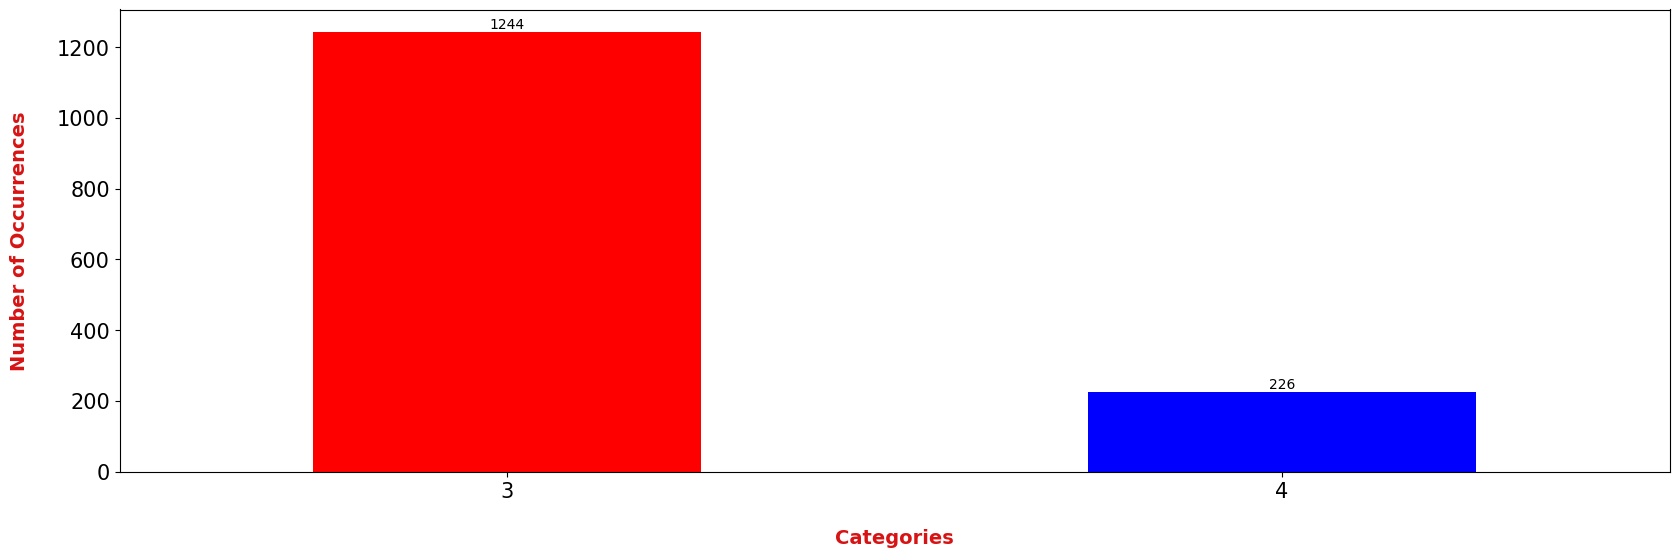

In [50]:
import matplotlib.pyplot as plt

# Assuming df["PerformanceRating"] is a valid column name; otherwise, replace it with the correct name
categories = ['3', '4']  # Replace with your actual category names
colors = ['red', 'blue']  # Replace with actual colors

plt.figure(figsize=(20, 6))

ax = df["PerformanceRating"].value_counts().plot(kind='bar', color=colors, rot=0)

ax.set_xticklabels(categories)

for p in ax.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height() + 1
    ax.annotate(int(p.get_height()), (x_pos, y_pos), ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Categories', weight='bold', color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight='bold', color="#D71313", fontsize=14, labelpad=20)

plt.show()


In [51]:
X_encoded = pd.get_dummies(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
y_pred_knn = knn_model.predict(X_test)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
sensitivity_knn = recall_score(y_test, y_pred_knn, average='macro')
specificity_knn = precision_score(y_test, y_pred_knn, average='macro')
print("K-NN Sonuçları:")
print("Confusion Matrix:\n", confusion_knn)
print("Accuracy:\n", accuracy_knn)
print("Sensitivity:\n", sensitivity_knn)
print("Specificitiy:\n", specificity_knn)

K-NN Sonuçları:
Confusion Matrix:
 [[247   4]
 [ 43   0]]
Accuracy:
 0.8401360544217688
Sensitivity:
 0.49203187250996017
Specificitiy:
 0.42586206896551726


In [55]:
import pandas as pd
from scipy.spatial.distance import euclidean
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv('company_status.csv')
df.sample(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
826,38,No,Travel_Rarely,433,Human Resources,Human Resources,1,3,Male,37,...,80,1,7,2,4,7,6,5,0,3
31,44,No,Travel_Rarely,1459,Research & Development,Other,1,4,Male,41,...,80,0,9,5,4,4,2,1,3,3


In [57]:
label_encoder = LabelEncoder()
df['Attrition_Numeric'] = label_encoder.fit_transform(df['Attrition'])

In [58]:
X = df[['Age', 'Attrition_Numeric', 'DailyRate', 'PerformanceRating']]
# Özellikleri normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [60]:
kmeans = KMeans(n_clusters=2, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [61]:
# Küme merkezlerini elde et
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=['Age', 'Attrition_Numeric', 'DailyRate', 'PerformanceRaiting'])

In [62]:
print("Eğitim Seti Küme Tahminleri:")
print(X_train_clusters)

Eğitim Seti Küme Tahminleri:
[1 1 1 ... 0 1 1]


In [63]:
# Test seti küme tahminlerini al
X_test_clusters = kmeans.predict(X_test)
# Test seti küme tahminlerini yazdır
print("\nTest Seti Küme Tahminleri:")
print(X_test_clusters)


Test Seti Küme Tahminleri:
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


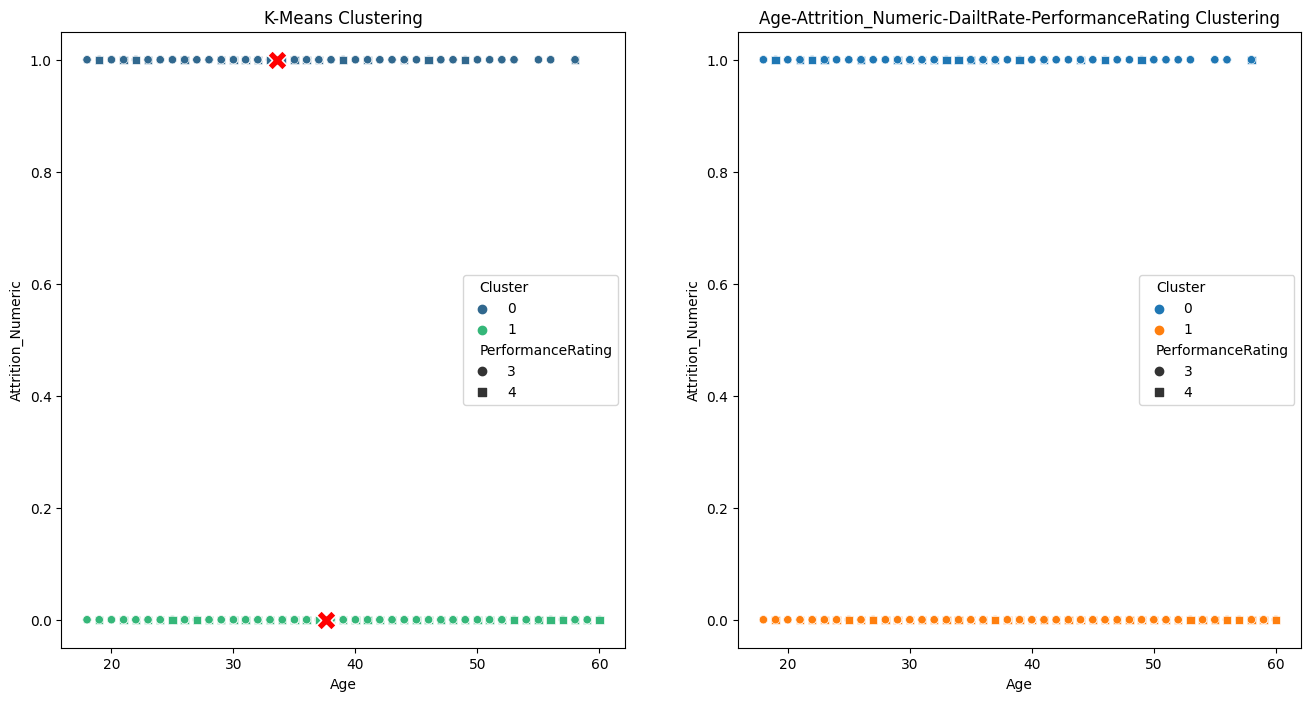

In [64]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='Attrition_Numeric', hue='Cluster', palette='viridis', style='PerformanceRating', markers=["o", "s", "D", "P"])
sns.scatterplot(x=df_cluster_centers['Age'], y=df_cluster_centers['Attrition_Numeric'], marker='X', s=200, color='red')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Attrition_Numeric', hue='Cluster', style='PerformanceRating', markers=["o", "s", "D", "P"])
plt.title('Age-Attrition_Numeric-DailtRate-PerformanceRating Clustering')

plt.show()


In [65]:
# Küme merkezlerini ve test seti tahminlerini içeren veri çerçevesini oluştur
df_test_clusters = pd.DataFrame(X_test_clusters, columns=['Cluster'])
df_test_clusters[['Age', 'Attrition_Numeric', 'DailtRate', 'PerformanceRating']] = X_test[:, [0, 1, 2, 3]]

# Her bir test örneği için öklid uzaklığını hesapla
df_test_clusters['Euclidean Distance'] = df_test_clusters.apply(
    lambda row: euclidean(row[['Age', 'Attrition_Numeric', 'DailtRate', 'PerformanceRating']], cluster_centers[int(row['Cluster'])]),
    axis=1
)

# Test seti küme tahminleri ve öklid uzaklıklarını yazdır
print(df_test_clusters[['Cluster', 'Euclidean Distance']])

     Cluster  Euclidean Distance
0          1              813.27
1          1              812.60
2          0              752.58
3          1              812.01
4          1              811.92
..       ...                 ...
289        1              814.62
290        1              814.97
291        1              812.03
292        1              812.33
293        1              814.69

[294 rows x 2 columns]
